In [2]:
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import seaborn as sns
import tensorflow as tf
%matplotlib inline


In [3]:
def plotchr(image,label,i):
    sns.set_context("talk")
    plt.subplot(1,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title("%d" % np.argmax(label))
    plt.imshow(image,cmap=plt.cm.gray_r)

In [4]:
np.random.seed(20170730)
tf.set_random_seed(20170730)

# 実験データの生成関数

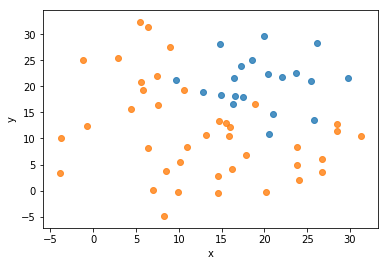

In [13]:
def generate_datablock(n, mu, var, label):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns =['x','y'])
    df['l' ] = label
    return df

df0 = generate_datablock(15, [7,7], 22, 0)
df1 = generate_datablock(15, [22,7], 22, 0)
df2 = generate_datablock(10, [7,22], 22, 0)
df3 = generate_datablock(20, [20,20], 22, 1)

df = pd.concat([df0,df1,df2,df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

sns.regplot(x="x", y="y", data=df[df['l']==1],fit_reg=False)
sns.regplot(x="x", y="y", data=df[df['l']==0],fit_reg=False)

plt.show()

# データの取り出し

In [14]:
train_x = train_set[['x','y']].as_matrix()
train_t = train_set[['l']].as_matrix().reshape([len(train_set),1])

# モデル定義

In [15]:
num_units = 2
mult = train_x.flatten().mean()   # x,yを区別しない平均値
mult

14.708559336266003

In [16]:
x = tf.placeholder(tf.float32,[None,2])

w1 = tf.Variable(tf.truncated_normal([2, num_units]))   # 0 を平均として分散1の正規分布乱数で初期化
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.tanh(tf.matmul(x,w1) + b1*mult)

w0 = tf.Variable(tf.zeros([num_units,1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden1,w0) + b0*mult)

In [9]:
sess.run(train_step, feed_dict = {x:train_x, t:train_t})

print(sess.run([b1,loss,accuracy], feed_dict = {x:train_x, t:train_t}))

NameError: name 'sess' is not defined

# 誤差関数の定義

In [17]:
t = tf.placeholder(tf.float32, [None,1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
# train_step = tf.train.AdamOptimizer().minimize(loss)
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 学習セッション

In [18]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [19]:
times = 0
for _ in range(1000):
    times += 1
    sess.run(train_step, feed_dict = {x:train_x, t:train_t})
    if times  % 100 == 0:
        loss_val, acc_val = sess.run(
            [loss, accuracy], feed_dict = {x:train_x, t:train_t})
        print("Step: {0:d}, Loss: {1:f}, Accuracy: {2:f}".format(times, loss_val, acc_val))

Step: 100, Loss: nan, Accuracy: 0.000000
Step: 200, Loss: nan, Accuracy: 0.000000
Step: 300, Loss: nan, Accuracy: 0.000000
Step: 400, Loss: nan, Accuracy: 0.000000
Step: 500, Loss: nan, Accuracy: 0.000000
Step: 600, Loss: nan, Accuracy: 0.000000
Step: 700, Loss: nan, Accuracy: 0.000000
Step: 800, Loss: nan, Accuracy: 0.000000
Step: 900, Loss: nan, Accuracy: 0.000000
Step: 1000, Loss: nan, Accuracy: 0.000000


# 検証

/Users/dan/.pyenv/versions/anaconda3-4.2.0/lib/python3.6/site-packages/matplotlib/colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/dan/.pyenv/versions/anaconda3-4.2.0/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


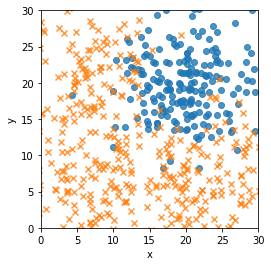

In [224]:
#train_set1 = train_set[train_set['l']==1]
#train_set1 = train_set[train_set['l']==0]

sns.regplot(x="x", y="y", data=df[df['l']==1],fit_reg=False, marker="o")
sns.regplot(x="x", y="y", data=df[df['l']==0],fit_reg=False,marker="x")

locations = []
for y1 in np.linspace(0,30,100):
    for x1 in np.linspace(0,30,100):
        locations.append([x1,y1])
p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100,100))
plt.imshow(p_vals, origin='lower', extent=(0,30,0,30), cmap=plt.cm.gray_r, alpha = 0.5)

In [196]:
train_set

,x,y,l
0,26.691678,9.105335,0
1,13.385203,4.167825,0
2,21.655397,17.926828,1
3,2.664655,16.821497,0
4,2.415894,19.125949,0
5,21.827428,11.379111,0
6,8.129098,7.185892,0
7,19.504617,7.343005,0
8,27.063080,12.834361,0
9,1.453432,7.456881,0


In [198]:
train_x

array([[ 26.69167829,   9.10533479],
       [ 13.3852025 ,   4.16782529],
       [ 21.65539693,  17.92682841],
       [  2.66465455,  16.8214967 ],
       [  2.41589351,  19.12594876],
       [ 21.82742757,  11.37911086],
       [  8.12909811,   7.18589153],
       [ 19.50461661,   7.34300543],
       [ 27.06307989,  12.83436131],
       [  1.45343165,   7.45688075],
       [  4.7340408 ,   7.91424825],
       [ 31.2204255 ,   7.94239192],
       [  5.22927811,  21.95021732],
       [ 14.35924145,  20.69605403],
       [  9.43925531,  31.5187137 ],
       [ 15.69623574,  -5.4652443 ],
       [ 26.70205966,   6.7798167 ],
       [ 18.79920713,  16.94122519],
       [ 23.60976895,  25.39391752],
       [  7.45133359,  18.31604823],
       [  1.58952831,   7.89901159],
       [ 13.96308493,   6.61062941],
       [ 25.04199466,   7.30301012],
       [ -4.97781525,  24.48412628],
       [  5.26323739,  14.58670654],
       [  0.5236508 ,   7.57234814],
       [ 18.28979856,   1.58044053],
 